In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
os.getcwd()

'D:\\Praxis Business School\\Second Term\\Advanced Machine Learning\\Practice'

In [3]:
#Reading the file
heart = pd.read_csv('heart.csv')

In [4]:
#Getting shape of the dataframe
heart.shape

(1025, 14)

In [5]:
heart.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
461,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
502,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
28,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
926,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
588,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0


In [6]:
#Checking the count of the classes
heart.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
#Checking if there are any missing values
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Separating the independent varaibles
x = heart.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [9]:
#Separating the target varaible
y = heart[['target']]
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [22]:
#Separating the dataset into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 4)

In [23]:
y_train = np.array(y_train['target'])
y_test1 = np.array(y_test['target'])

In [24]:
y_train.shape

(717,)

In [25]:
y_train

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [26]:
y_test1.shape

(308,)

In [27]:
y_test.shape

(308, 1)

In [28]:
y_test

,target
932,1
76,1
353,1
621,0
830,1
...,...
288,1
398,1
939,1
592,0


### A) Decision Tree Classifier
### 1) Without Hyper parameter Optimization

In [29]:
#Fitting a decision tree with default hyper parameters
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred_tree = tree.predict(x_test)

In [30]:
#Checking different metrics for decision tree model with default hyper parameters
print('Checking different metrics for decision tree model with default hyper parameters:\n')
print("Training accuracy: ",tree.score(x_train,y_train))

acc_score = accuracy_score(y_test, pred_tree)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, pred_tree)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,pred_tree)
print('ROC AUC score: ',roc_auc)

class_rep2 = classification_report(y_test,pred_tree)
print('Classification Report: \n',class_rep2)

Checking different metrics for decision tree model with default hyper parameters:

Training accuracy:  1.0
Testing accuracy:  0.9902597402597403
Confusion Matrix: 
 [[156   0]
 [  3 149]]
ROC AUC score:  0.9901315789473684
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       156
           1       1.00      0.98      0.99       152

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



Observations & Conclusions:
We can see that the training accuracy of Decision Tree with default hyperparameters is 1 i.e. 100% accuracy. Whereas when we fit the same model on testing data, the accuracy reduces to 99% approx. Clearly the model has overfit the training data and also the variance is very high i.e. the model is behaving differently for different samples.

# With Hyper parameter Optimization

In [16]:
#Setting values for the parameters
#n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridT = GridSearchCV(tree, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestT = gridT.fit(x_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [17]:
#Printing the best hyperparameters
print('The best hyper parameters are: \n',gridT.best_params_)

The best hyper parameters are: 
 {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Fitting Descision Tree with best Hyper parameters

In [20]:
#Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV
tree1 = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=10, min_samples_leaf=1,
                               min_samples_split=2, max_features=5)
tree1.fit(x_train,y_train)
pred_tree1 = tree1.predict(x_test)

In [21]:
#Checking different metrics for decision tree model after tuning the hyperparameters
print('Checking different metrics for decision tree model after tuning the hyperparameters:\n')
print("Training accuracy: ",tree1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_tree1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_tree1)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_tree1)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(y_test,pred_tree1)
print('Classification Report: \n',class_rep2)

Checking different metrics for decision tree model after tuning the hyperparameters:

Training accuracy:  0.9581589958158996
Testing accuracy:  0.922077922077922
Confusion Matrix: 
 [[145  11]
 [ 13 139]]
ROC AUC score:  0.9219804318488529
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       156
           1       0.93      0.91      0.92       152

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308



Observations & Conclusions:
Now, when we applied the GridSearchCV algorithm to our model which is used to select the best hyperparameters, we see that the training accuracy is 95% aprox and testing accuracy is 92%. The training accuracy has reduced after tuning the hyperparameters but it has also reduced the overfitting in Decision Tree.

ROC AUC curve before and after tuning hyper parameters:



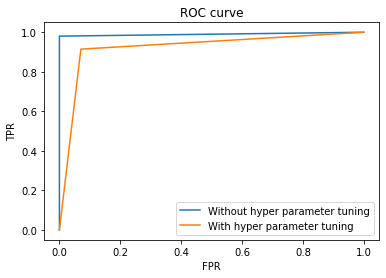

In [31]:
#Plotting the ROC AUC curve before and after tuning hyper parameters
print('ROC AUC curve before and after tuning hyper parameters:\n')
fpr_tree,tpr_tree,thre_tree = roc_curve(y_test,pred_tree)
fpr_tree1,tpr_tree1,thre_tree1 = roc_curve(y_test1,pred_tree1)
plt.clf()
ax = plt.subplot(111)
ax.plot(fpr_tree, tpr_tree,label="Without hyper parameter tuning")
ax.plot(fpr_tree1, tpr_tree1,label="With hyper parameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

# Plotting validation curves for each hyper parameter

### Max Depth

In [32]:
#Plotting the validation curve of training and testing scores for max_depth
from sklearn.model_selection import validation_curve
param_range= max_depth
train_scores, test_scores = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range,cv = 3)

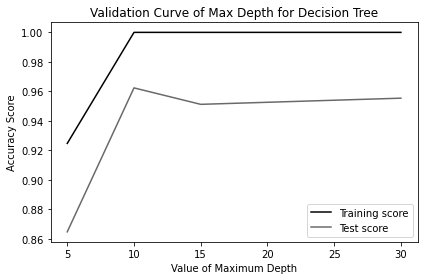

In [33]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Max Depth for Decision Tree")
plt.xlabel("Value of Maximum Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Minimum Sample Split

In [34]:
#Plotting the validation curve of training and testing scores for min_samples_split
from sklearn.model_selection import validation_curve
param_range= min_samples_split
train_scores, test_scores = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = param_range,cv = 3)

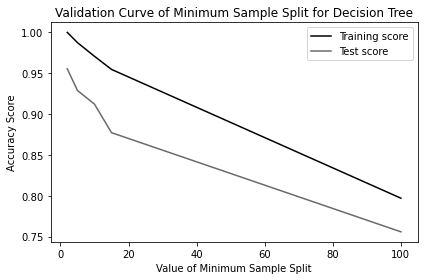

In [35]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Minimum Sample Split for Decision Tree")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Minimum Sample Leaf

In [36]:
#Plotting the validation curve of training and testing scores for min_samples_leaf
from sklearn.model_selection import validation_curve
param_range= min_samples_leaf
train_scores, test_scores = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = param_range,cv = 3)

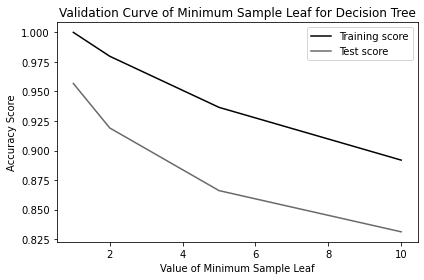

In [37]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")


#Create plot
plt.title("Validation Curve of Minimum Sample Leaf for Decision Tree")
plt.xlabel("Value of Minimum Sample Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Bagging Classifier

In [38]:
#Fitting Bagging Classifier model with default hyper parameters
bagg = BaggingClassifier()
bagg.fit(x_train,y_train)
pred_bagg = bagg.predict(x_test)

In [39]:
#Checking different metrics for bagging model with default hyper parameters
print('Checking different metrics for bagging model with default hyper parameters:\n')
print("Training accuracy: ",bagg.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_bagg)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_bagg)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_bagg)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(y_test,pred_bagg)
print('Classification Report: \n',class_rep2)

Checking different metrics for bagging model with default hyper parameters:

Training accuracy:  0.99860529986053
Testing accuracy:  0.974025974025974
Confusion Matrix: 
 [[156   0]
 [  8 144]]
ROC AUC score:  0.9736842105263157
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       156
           1       1.00      0.95      0.97       152

    accuracy                           0.97       308
   macro avg       0.98      0.97      0.97       308
weighted avg       0.98      0.97      0.97       308



# With Hyper parameter Optimization

In [40]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 10, 15, 25, 30]
max_samples = [5, 10, 25, 50, 100]
max_features = [1, 2, 5, 10, 13]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(bagg, hyperbag, cv = 3, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(x_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


In [41]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridbag.best_params_)

The best hyper parameters are:
 {'max_features': 5, 'max_samples': 100, 'n_estimators': 800}


# Fitting Bagging Classifier with best Hyper parameters

In [42]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
bagg1 = BaggingClassifier(max_features=5, max_samples=100,n_estimators= 1000)
bagg1.fit(x_train,y_train)
pred_bagg1 = bagg1.predict(x_test)

In [43]:
#Checking different metrics for bagging model after tuning the hyperparameters
print('Checking different metrics for bagging model after tuning the hyperparameters:\n')
print("Training accuracy: ",bagg1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_bagg1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_bagg1)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_bagg1)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(y_test,pred_bagg1)
print('Classification Report: \n',class_rep2)

Checking different metrics for bagging model after tuning the hyperparameters:

Training accuracy:  0.9637377963737797
Testing accuracy:  0.9188311688311688
Confusion Matrix: 
 [[138  18]
 [  7 145]]
ROC AUC score:  0.9192813765182186
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       156
           1       0.89      0.95      0.92       152

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308



ROC AUC curve before and after tuning hyper parameters:



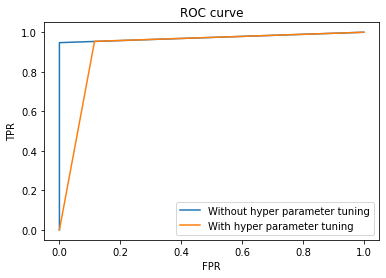

In [44]:
#Plotting the ROC AUC curve before and after tuning hyper parameters
print('ROC AUC curve before and after tuning hyper parameters:\n')
fpr_bag,tpr_bag,thre_bag = roc_curve(y_test1,pred_bagg)
fpr_bag1,tpr_bag1,thre_bag1 = roc_curve(y_test1,pred_bagg1)
plt.clf()
ax = plt.subplot(111)
ax.plot(fpr_bag, tpr_bag,label="Without hyper parameter tuning")
ax.plot(fpr_bag1, tpr_bag1,label="With hyper parameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

# Plotting validation curves for each hyper parameter

In [45]:
#Plotting the validation curve of training and testing scores for n_estimators
from sklearn.model_selection import validation_curve
param_range= n_estimators
train_scores, test_scores = validation_curve(
                                BaggingClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range,cv = 3)

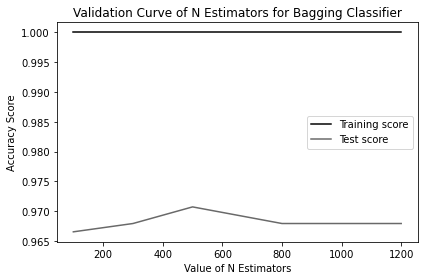

In [46]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of N Estimators for Bagging Classifier")
plt.xlabel("Value of N Estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Maximum Features

In [48]:
#Plotting the validation curve of training and testing scores for max_features
from sklearn.model_selection import validation_curve
param_range= max_features
train_scores, test_scores = validation_curve(
                                BaggingClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = param_range,cv = 3)

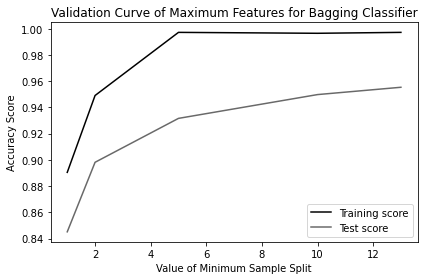

In [49]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Maximum Features for Bagging Classifier")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Maximum Samples

In [50]:
from sklearn.model_selection import validation_curve
param_range= max_samples
train_scores, test_scores = validation_curve(
                                BaggingClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_samples', 
                                param_range = param_range,cv = 3)

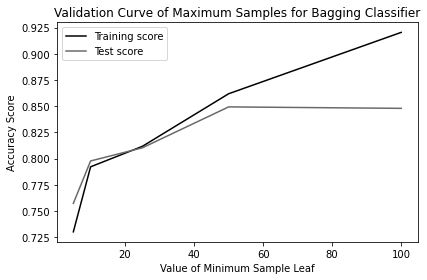

In [51]:
# Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")


# Create plot
plt.title("Validation Curve of Maximum Samples for Bagging Classifier")
plt.xlabel("Value of Minimum Sample Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Random Forest Classifier

### Without Hyper parameter Optimization

In [52]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [53]:
#Checking different metrics for random forest model with default hyper parameters
print('Checking different metrics for random forest model with default hyper parameters:\n')
print("Training accuracy: ",rf.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_rf)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_rf)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_rf)
print('ROC AUC score: ',roc_auc)
class_rep3 = classification_report(y_test,pred_rf)
print('Classification Report: \n',class_rep3)

Checking different metrics for random forest model with default hyper parameters:

Training accuracy:  1.0
Testing accuracy:  0.9902597402597403
Confusion Matrix: 
 [[156   0]
 [  3 149]]
ROC AUC score:  0.9901315789473684
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       156
           1       1.00      0.98      0.99       152

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



### With Hyper parameter Optimization

In [54]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

#Applying GridSearchCV to get the best value for hyperparameters
gridrf = GridSearchCV(rf, hyper_rf, cv = 3, verbose = 1, n_jobs = -1)
bestrf = gridrf.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [56]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridrf.best_params_)

The best hyper parameters are:
 {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [57]:
#Fitting the random forest model with the best hyper parameters obtained through GridSearchCV
rf1 = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf1.fit(x_train,y_train)
pred_rf1 = rf1.predict(x_test)

ROC AUC curve before and after tuning hyper parameters:



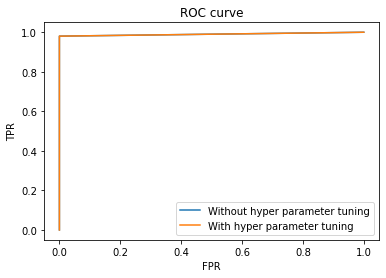

In [58]:
#Plotting the ROC AUC curve before and after tuning hyper parameters
print('ROC AUC curve before and after tuning hyper parameters:\n')
fpr_rf,tpr_rf,thre_rf = roc_curve(y_test,pred_rf)
fpr_rf1,tpr_rf1,thre_rf1 = roc_curve(y_test1,pred_rf1)
plt.clf()
ax = plt.subplot(111)
ax.plot(fpr_rf, tpr_rf,label="Without hyper parameter tuning")
ax.plot(fpr_rf1, tpr_rf1,label="With hyper parameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

# Plotting validation curves for each hyper parameter

### N Estimators

In [59]:
#Plotting the validation curve of training and testing scores for n_estimators
from sklearn.model_selection import validation_curve
param_range= n_estimators
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range,cv = 3)

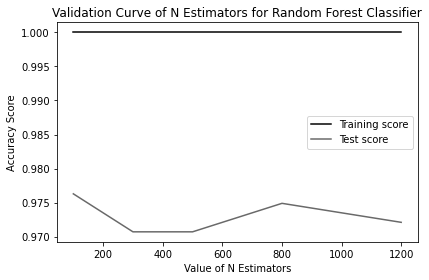

In [60]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of N Estimators for Random Forest Classifier")
plt.xlabel("Value of N Estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Maximum Depth

In [61]:
#Plotting the validation curve of training and testing scores for max_depth
from sklearn.model_selection import validation_curve
param_range= max_depth
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range,cv = 3)

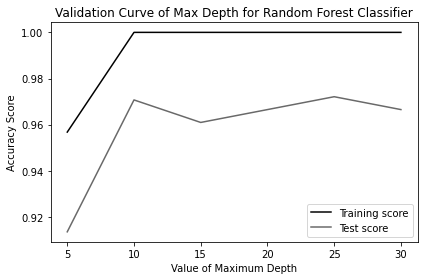

In [62]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Max Depth for Random Forest Classifier")
plt.xlabel("Value of Maximum Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Minimum Sample Split

In [64]:
#Plotting the validation curve of training and testing scores for min_samples_split
from sklearn.model_selection import validation_curve
param_range= min_samples_split
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = param_range,cv = 3)

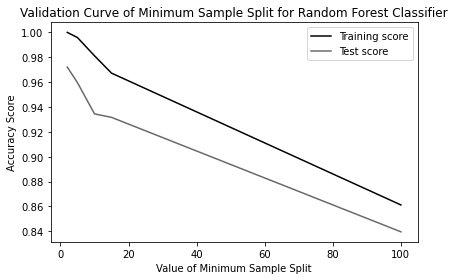

In [65]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Minimum Sample Split for Random Forest Classifier")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Minimum Sample Leaf

In [66]:
#Plotting the validation curve of training and testing scores for min_samples_leaf
from sklearn.model_selection import validation_curve
param_range= min_samples_leaf
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = param_range,cv = 3)

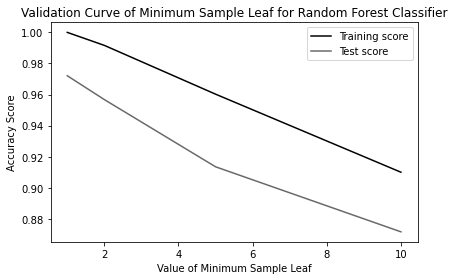

In [67]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")


#Create plot
plt.title("Validation Curve of Minimum Sample Leaf for Random Forest Classifier")
plt.xlabel("Value of Minimum Sample Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()